![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [40]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df = df.head(10000)
print(df.shape)
df.head(10)

(10000, 3)


,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.000000
1,5342103,"NO!, Let him, we need a Conservative government.",0.000000
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.200000
3,551008,"As always, yours is dripping with sarcasm, whi...",0.000000
4,865998,The dirty little secret is that the price rang...,0.300000
5,5790966,"Light gets bent by gravity. However, it isn't...",0.000000
6,5241987,"This is a bad joke, we rewrite history every t...",0.000000
7,6116383,If some homeless actually live peacefully toge...,0.000000
8,653122,Thanks. I will.,0.166667
9,5439407,Okay.....Should we not be investigating Eric H...,0.500000


<Axes: >

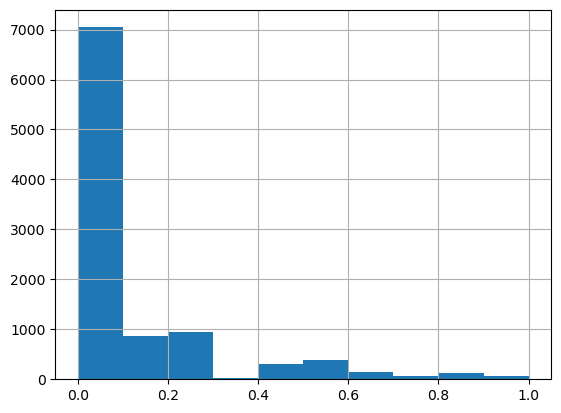

In [41]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [42]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    10000.000000
mean         0.102815
std          0.198588
min          0.000000
25%          0.000000
50%          0.000000
75%          0.166667
max          1.000000
Name: target, dtype: float64

In [43]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [44]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [46]:
# Celda 1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

vect_A = CountVectorizer()
X_train_vec = vect_A.fit_transform(X_train)

X_test_vec = vect_A.transform(X_test)

modelo = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=30) 
modelo.fit(X_train_vec, y_train)

y_pred = modelo.predict(X_test_vec)

# Acotar predicciones entre 0 y 1
y_pred[y_pred < 0] = 0
y_pred[y_pred > 1] = 1

mse_countvdef = mean_squared_error(y_test, y_pred)

print(f"MSE con Random Forest y CountVectorizer por defecto: {mse_countvdef:.4f}")


MSE con Random Forest y CountVectorizer por defecto: 0.0295


### Comentarios

1. Elegimos Random Forest por su manejo de relaciones no lineales y es mas robusto ante overfitting y por lo general tienen una buena precisión
2. Se vectotiza sin n-gramas
3. Al trabajar con los 500 mil datos el pocesamiento y rendimiento computacional fue muy malo, por lo tanto se trabajo con una muestra de 20mil registros.
4. El modelo mostró un MSE = 0.0295

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [48]:
# Celda 2

vect_B = CountVectorizer(ngram_range=(3, 3))
X_train_vec = vect_B.fit_transform(X_train)

X_test_vec = vect_B.transform(X_test)

modelo = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=30) 
modelo.fit(X_train_vec, y_train)

y_pred = modelo.predict(X_test_vec)

# Acotar predicciones entre 0 y 1
y_pred[y_pred < 0] = 0
y_pred[y_pred > 1] = 1

mse_trigrama = mean_squared_error(y_test, y_pred)

print(f"MSE con Random Forest y CountVectorizer de Trigramas: {mse_trigrama:.4f}")


MSE con Random Forest y CountVectorizer de Trigramas: 0.0479


### Comentarios

- El MSE aumentó de 0.0295 (unigramas) a 0.0479 (trigramas). Lo cual nos indica que al usar tregramas en este problema se empeora el desempeño del modelo
- No se sabe si al tomar una muestra de 10mil datos, puede estar afectando el modelo con trigramas.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

**Qué es?**

TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica en el Procesamiento de Leguaje natural que convierte las palabras en valores numéricos
y los vectoriza. Esta técnica mas alla de contar las palabras, mide la frecuencia de las palabras en un documento y tambien la frecuencia de esas palabras entre todos los documentos, con esto asigna qué tan importante es una palabra dentro del documento.

**Como funciona?**

Esta técnica se basa en medir la importancia de una palabra midiedo la frecuencia de esa palabra tanto en el cuerpo de un documento, asi como en todo el conjunto de documentos.

- TF (Term Frequency): mide cuántas veces aparece una palabra en un documento. Ej: Si la palabra token aparece 6 veces en un documento, su frecuencia TF es 6.

- IDF (Inverse Document Frequency): mide qué tan rara es una palabra en todo el counjunto de documentos. Esto quiere decir que si una palabra aparece en muchos documentos, su IDF es bajo, de lo contrario si aparece en pocos documentos, esto quiere decir que no es muy comun y su IDF será alto.

El valor final es el producto de ambos entre TF y IDF


**Ventajas**
- Da más peso a palabras importantes y menos a palabras comunes.	
- Mejora la calidad de los modelos al reducir el impacto de "ruido" (palabras como "el", "de", "la").	
- Ideal para tareas como clasificación de texto, búsqueda de información, etc.
- Es escalable y puede utilizarse con corpus de texto extensos, lo que lo hace ideal para procesar y analizar grandes cantidades de datos de texto.
- Es facil de entender e implementar.

**Desventajas**
- No captura la posición en el texto.
- No puede capturar la semántica.
- No considera el contexto.
- Puede eliminar información útil, como "no", "muy", "nunca" que son clave en ciertos contextos.
- Sensibilidad a cambios de en el cinjunto de datos.



## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [52]:
# Celda 4

vect_C = TfidfVectorizer(ngram_range=(1, 1))
X_train_vec = vect_C.fit_transform(X_train)

X_test_vec = vect_C.transform(X_test)

modelo = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=30) 
modelo.fit(X_train_vec, y_train)

y_pred = modelo.predict(X_test_vec)

# Acotar predicciones entre 0 y 1
y_pred[y_pred < 0] = 0
y_pred[y_pred > 1] = 1

mse_tfidv = mean_squared_error(y_test, y_pred)

print(f"MSE con Random Forest y TfidVectorizer: {mse_tfidv:.4f}")

MSE con Random Forest y TfidVectorizer: 0.0281


### Comentario

- Al Utilizar TfidfVectorizer para tokenizar los textos, el MSE obtenido fue 0.0281. El cual es más bajo que los métodos anteriores.
- Al parecer el uso de TfidfVectorizer permitió mejorar el desempeño del modelo al ponderar cada término según su importancia en el conjunto de documentos.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

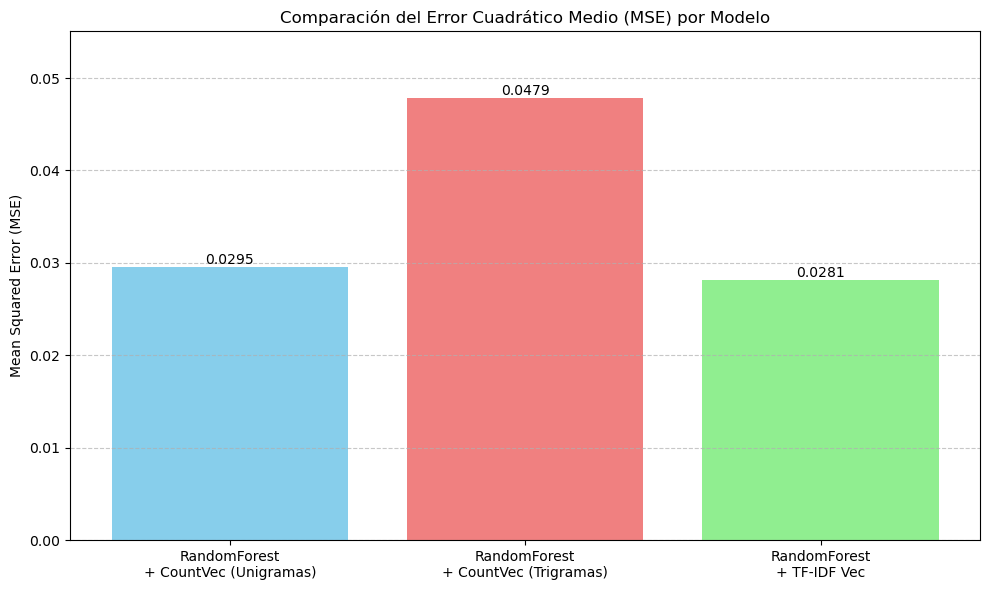

In [54]:
# Celda 5
import matplotlib.pyplot as plt

labels = [
    'RandomForest\n+ CountVec (Unigramas)',
    'RandomForest\n+ CountVec (Trigramas)',
    'RandomForest\n+ TF-IDF Vec' 
]

mse_values = [mse_countvdef, mse_trigrama, mse_tfidv]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, mse_values, color=['skyblue', 'lightcoral', 'lightgreen'])

plt.title('Comparación del Error Cuadrático Medio (MSE) por Modelo')
plt.ylabel('Mean Squared Error (MSE)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

plt.ylim(0, max(mse_values) * 1.15)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Conclusiones
* Podemos observar que pasar de Unigramas a Trigramas en el CountVectorize empeoró el performance del modelo, por lo tanto agrupar conjuntos de 3 palabras no ayuda mejorar la predición de la toxicidad.
* Tfidf mostro un performance superior vs los modelos con preprocesamiento CountVectorize, alineandose con las ventajas que habíamos mencionado en el punto 3.
* En general los modelos con preprocesamiento(ya sea CountVectorize o Tfidf) mostraron un excelente poder predictivo, siendo el modelo con Tfdif el que tuvo el mejor performance con MSE de 0.0281

**Resultados:**

Punto 1 - CountVectorizer (unigrama) | 0.02407
Punto 2 - CountVectorizer (trigrama) | 0.03900
Punto 4 - TfidfVectorizer | 0.02359


**Conclusiones**

- Podemos observar que pasar de Unigramas a Trigramas en el CountVectorize empeoró el performance del modelo, por lo tanto agrupar conjuntos de 3 palabras no ayuda mejorar la predición de la toxicidad.
- Tfidf mostro un performance superior vs los modelos con preprocesamiento CountVectorize, alineandose con las ventajas que habíamos mencionado en el punto 3.
- En general los modelos con preprocesamiento(ya sea CountVectorize o Tfidf) mostraron un excelente poder predictivo, siendo el modelo con Tfdif el que tuvo el mejor performance con MSE de 0.0281
- Debido al alto consumo computacional de hacer el ejercicio  con los 500mil registros. Queda la duda si con más datoos, los trigramas podrían haber funcionado mejor, porque habría más ejemplos de cada trigrama.
